In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

#Número Top de Gens. En aquest cas vull els TOP500
n=500

#Fitxer que contè en CV els gens més epxressats de manera ordenada decreixent.
teixits = pd.read_csv('D:/TFM/ANALISI_MODELS/Datasets/all_gensCV_noversio_ZA.csv',sep =",")

In [2]:
#data = teixits.iloc[:, 1:4]
data=teixits

In [3]:
if (n==0 or n>(len(teixits.columns)-3)):
    n=len(teixits.columns)-3
    
data = teixits.iloc[:, 2:n+3]

In [4]:
data

,SMTSD,ENSG00000160882,ENSG00000259384,ENSG00000172023,ENSG00000280800,ENSG00000172179,ENSG00000210117,ENSG00000169248,ENSG00000159723,ENSG00000210154,...,ENSG00000137331,ENSG00000280401,ENSG00000232926,ENSG00000175147,ENSG00000189127,ENSG00000137877,ENSG00000146360,ENSG00000168394,ENSG00000165269,ENSG00000140479
0,Brain - Cortex,0.35630,0.0000,0.00000,0.00000,0.00000,0.4912,0.03501,0.30600,6.876,...,7.638,0.2594,1.5180,0.9796,0.48140,2.1560,1.3740,9.554,0.6874,6.7030
1,Brain - Cerebellum,0.43660,0.2089,0.73670,0.05680,0.00000,0.7710,0.21980,0.48040,3.084,...,7.678,3.7160,14.9900,27.7500,0.02606,12.5500,0.6739,14.010,21.9000,6.3700
2,Brain - Cortex,0.18460,4.2000,1.93800,0.00000,8.21200,6.0850,0.68150,0.11610,16.520,...,8.745,0.4878,0.5634,0.7291,0.12490,1.6870,2.1880,10.500,0.5530,1.3330
3,Brain - Cerebellum,0.09784,15.7600,0.12580,0.05819,9.01800,7.1090,0.45040,0.28120,12.640,...,6.465,3.8590,6.6950,28.1700,0.05339,18.0400,0.1381,14.610,9.6150,3.9250
4,Brain - Cortex,0.01387,6.9020,0.06242,0.02888,11.84000,1.9600,0.11180,0.34890,5.095,...,9.811,0.6987,1.3290,0.8183,0.19210,1.1010,2.0010,9.743,0.5984,2.4540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,Brain - Cortex,0.34510,0.0000,1.62900,0.00000,0.00000,3.3300,28.63000,0.50800,4.757,...,35.750,0.3140,1.2330,1.1530,0.24110,1.7640,5.5040,34.230,0.3228,2.4390
2637,Brain - Cerebellum,0.39970,0.7800,1.74600,0.14680,0.00000,7.9730,0.00000,0.65050,7.973,...,6.118,3.4210,6.7570,42.4700,0.04491,21.2800,0.1626,12.920,13.2100,4.5920
2638,Brain - Cortex,0.22160,8.2930,1.51900,0.00000,11.39000,2.9820,0.08501,0.58380,9.541,...,68.370,0.5905,1.3680,2.2680,0.02015,0.8797,1.3760,15.590,2.7310,0.8401
2639,Brain - Cerebellum,0.00000,1.8660,0.00000,0.58550,0.55470,2.3840,0.00000,0.42440,9.537,...,5.638,2.4660,6.3400,22.3100,0.25520,8.0030,0.1111,16.220,5.1240,5.0620


In [5]:
#Creació conjunt train i test

x,y=data.iloc[:, 1:n+1],data.iloc[:, 0]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

x_train = np.log2(x_train+1)
x_test = np.log2(x_test+1)

In [6]:
#Definim PCA

pca = PCA()

z= pca.fit_transform(x_train)

x_train_pca = z
x_test_pca  = pca.transform(x_test)

100 components expliquen un 95% de la variança. De 500 dimensions a 100


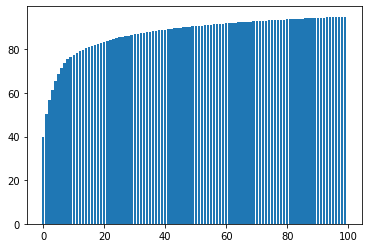

In [7]:
total = sum(pca.explained_variance_)

k = 0
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " components expliquen un 95% de la variança. De ",n," dimensions a ", k, sep='')

pca = PCA(n_components=k)

x_train.pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)

x_test_pca = pca.transform(x_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [8]:
#Dinàmicament agafo el numero de Dimensions de PCA: k

principalDf = pd.DataFrame(data = x_train_pca[:,0:k])
             #, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-6.725283,-4.765965,-3.086102,4.556556,0.325701,2.336930,-2.858807,6.937564,6.678532,-2.049946,...,-0.364864,-0.547642,-1.288150,0.963923,-0.431215,0.884864,0.528462,-0.022969,1.357608,-0.027818
1,44.299729,-1.862577,1.296452,0.151923,-1.844832,0.108781,-0.086329,0.736490,-0.636130,-2.315469,...,-1.252286,0.221699,0.359043,0.580437,-0.462969,1.799488,-0.146181,-1.815921,-0.461499,-0.637478
2,-10.786177,4.127398,-7.613983,-0.443110,6.072335,2.460716,7.897113,1.032687,-2.077164,9.889369,...,0.280938,-0.870726,-0.469707,1.608313,0.820520,1.182500,0.070644,-0.505422,-0.830554,0.660942
3,-9.372448,-13.732273,-6.838510,2.089976,-8.986358,-4.299633,2.547540,-3.335985,-0.775943,-3.091851,...,0.185211,-0.618001,0.143524,-0.097866,-0.086739,-0.616474,0.107842,0.846637,0.305610,-0.066532
4,-8.485690,-12.461041,-5.525894,3.093159,-3.618844,-0.169717,2.791670,-1.039319,-1.119373,-2.060006,...,-0.990087,0.169464,-0.601721,-1.345953,-0.443658,0.680093,0.509266,0.379360,1.671171,-0.246788


In [9]:
x_train_pca[:,0:11].shape

(2112, 11)

In [10]:
principalDf.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

finalDF = pd.concat([principalDf, y_train], axis=1)

finalDF.head(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,SMTSD
0,-6.725283,-4.765965,-3.086102,4.556556,0.325701,2.336930,-2.858807,6.937564,6.678532,-2.049946,...,-0.547642,-1.288150,0.963923,-0.431215,0.884864,0.528462,-0.022969,1.357608,-0.027818,Brain - Hippocampus
1,44.299729,-1.862577,1.296452,0.151923,-1.844832,0.108781,-0.086329,0.736490,-0.636130,-2.315469,...,0.221699,0.359043,0.580437,-0.462969,1.799488,-0.146181,-1.815921,-0.461499,-0.637478,Brain - Cerebellum
2,-10.786177,4.127398,-7.613983,-0.443110,6.072335,2.460716,7.897113,1.032687,-2.077164,9.889369,...,-0.870726,-0.469707,1.608313,0.820520,1.182500,0.070644,-0.505422,-0.830554,0.660942,Brain - Frontal Cortex (BA9)
3,-9.372448,-13.732273,-6.838510,2.089976,-8.986358,-4.299633,2.547540,-3.335985,-0.775943,-3.091851,...,-0.618001,0.143524,-0.097866,-0.086739,-0.616474,0.107842,0.846637,0.305610,-0.066532,Brain - Nucleus accumbens (basal ganglia)
4,-8.485690,-12.461041,-5.525894,3.093159,-3.618844,-0.169717,2.791670,-1.039319,-1.119373,-2.060006,...,0.169464,-0.601721,-1.345953,-0.443658,0.680093,0.509266,0.379360,1.671171,-0.246788,Brain - Frontal Cortex (BA9)


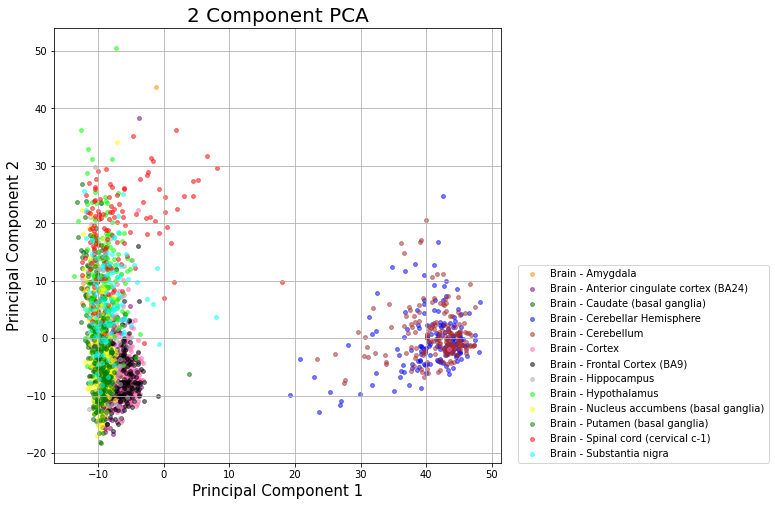

In [11]:
#Visualitzo la projecció 2D

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

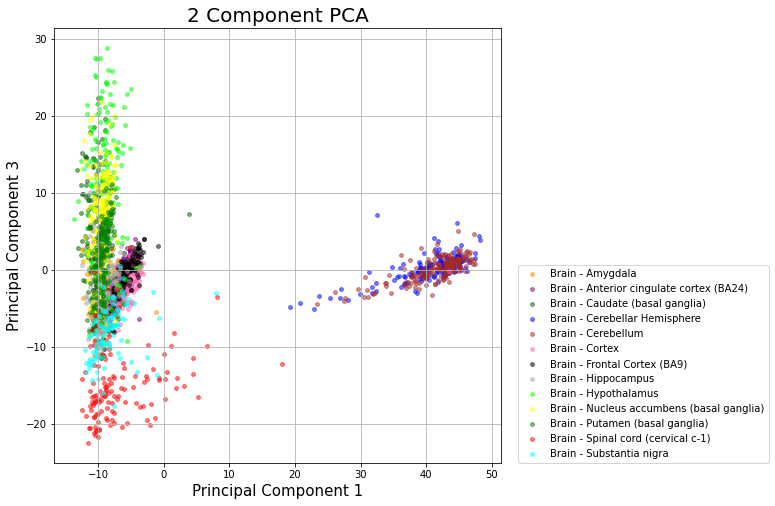

In [12]:

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Brain - Amygdala',
           'Brain - Anterior cingulate cortex (BA24)',
           'Brain - Caudate (basal ganglia)',
           'Brain - Cerebellar Hemisphere',
           'Brain - Cerebellum',
           'Brain - Cortex',
           'Brain - Frontal Cortex (BA9)',
           'Brain - Hippocampus', 
           'Brain - Hypothalamus',       
           'Brain - Nucleus accumbens (basal ganglia)', 
           'Brain - Putamen (basal ganglia)',
           'Brain - Spinal cord (cervical c-1)',
           'Brain - Substantia nigra']

import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 13))

colors = {'red':   ((0.0, 0.0, 0.0),
                    (0.5, 0.0, 0.1),
                    (1.0, 1.0, 1.0)),

          'green': ((0.0, 0.0, 0.0),
                    (1.0, 0.0, 0.0)),

          'blue':  ((0.0, 0.0, 1.0),
                    (0.5, 0.1, 0.0),
                    (1.0, 0.0, 0.0))
          }

colors = {"black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"}

for target, color in zip(targets,colors):
    indicesToKeep = finalDF['SMTSD'] == target    
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 2]
               , c = color               
               , s = 15, alpha=0.5)
ax.legend(targets, loc=(1.04,0))


ax.grid()

<b>tSNE Perplexity 30</b>

In [13]:
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, random_state=1234)

points = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame({'X':points[:,0],
                        'Y':points[:,1],
                        'Tipus Teixit':y_train})
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2112 samples in 0.001s...
[t-SNE] Computed neighbors for 2112 samples in 0.197s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2112
[t-SNE] Computed conditional probabilities for sample 2000 / 2112
[t-SNE] Computed conditional probabilities for sample 2112 / 2112
[t-SNE] Mean sigma: 5.585993
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.575592
[t-SNE] KL divergence after 1000 iterations: 1.180901


,X,Y,Tipus Teixit
0,-8.205609,-14.034492,Brain - Hippocampus
1,-3.346572,61.592331,Brain - Cerebellum
2,6.722091,-20.985870,Brain - Frontal Cortex (BA9)
3,-8.976582,3.795849,Brain - Nucleus accumbens (basal ganglia)
4,-4.930011,1.667437,Brain - Frontal Cortex (BA9)


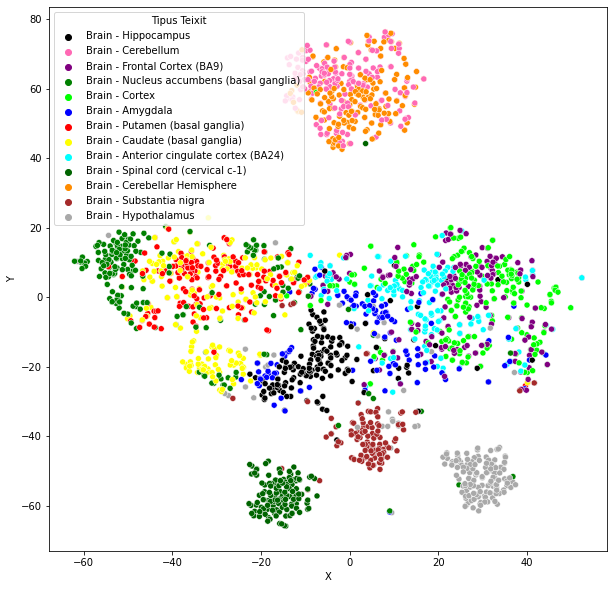

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x="X", y="Y",
              hue="Tipus Teixit",
              palette=["black","hotpink", "purple", "green","lime", "blue", "red","yellow","cyan", "darkgreen","darkorange", "brown", "darkgrey"],
              #legend='full',              
              data=tsne_df);

<b>Realització de Models</b>

<b>Model Classificador kNN</b>

In [15]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={"n_neighbors":range(5,25), "weights": ["uniform","distance"]}


# Validació creuada
# ==============================================================================
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()


grid = GridSearchCV(model , param_grid = param_grid,
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,                           
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(kNN) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model2 = grid.best_estimator_

r_model2 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions2 = model2.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions2,
            normalize = True
           )
print("")
print(f"(kNN) El accuracy de test és: {100*accuracy2}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions2,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 40 candidates, totalling 400 fits
39 # Prec. mitjana:  71.30756505409998  desv.:  2.614352170027152  paràmetres:  {'n_neighbors': 5, 'weights': 'uniform'}
40 # Prec. mitjana:  71.16449074488061  desv.:  2.148348092367899  paràmetres:  {'n_neighbors': 5, 'weights': 'distance'}
37 # Prec. mitjana:  73.20218188321559  desv.:  2.2355892419683046  paràmetres:  {'n_neighbors': 6, 'weights': 'uniform'}
38 # Prec. mitjana:  72.20692121970849  desv.:  2.17535631589018  paràmetres:  {'n_neighbors': 6, 'weights': 'distance'}
36 # Prec. mitjana:  73.86457122417956  desv.:  2.5211837256511394  paràmetres:  {'n_neighbors': 7, 'weights': 'uniform'}
34 # Prec. mitjana:  74.05302691585443  desv.:  2.158871257160518  paràmetres:  {'n_neighbors': 7, 'weights': 'distance'}
32 # Prec. mitjana:  74.28999374049897  desv.:  1.7825352793062916  paràmetres:  {'n_neighbors': 8, 'weights': 'uniform'}
35 # Prec. mitjana:  73.91129392828401  desv.:  1.8481024135252246  paràmetres:  {'n_

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,27,2,0,0,0,1,1,2,0,0,1,0,0
Brain - Anterior cingulate cortex (BA24),0,21,0,0,0,2,5,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,1,29,0,0,0,0,0,0,2,20,0,0
Brain - Cerebellar Hemisphere,0,0,0,41,10,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,8,47,0,0,0,0,0,0,0,0
Brain - Cortex,0,2,0,0,1,32,7,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),2,1,0,0,0,5,25,0,0,0,0,0,0
Brain - Hippocampus,3,3,1,0,0,1,2,30,0,0,0,0,1
Brain - Hypothalamus,0,0,0,1,0,0,0,1,35,1,0,0,1


<b>SVM</b>

In [16]:
#Emprant Reducció PCA
#============================
# Grid d'hiperparàmetres
# ==============================================================================
param_grid = {"C": (0.01, 0.1, 1, 10, 100, 150, 200, 250 , 300, 1000), "gamma": (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.005, 0.1,0.5, 1, 10)}

# Validació creuada
# ==============================================================================
from sklearn import svm

model = svm.SVC()
grid = GridSearchCV(model, param_grid = param_grid,                           
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)

    
# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(SVM) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model3 = grid.best_estimator_

r_model3 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions3 = model3.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy3 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions3,
            normalize = True
           )
print("")
print(f"(SVM) El accuracy de test és: {100*accuracy3}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions3,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
53 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-06}
53 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 1e-05}
53 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.0001}
52 # Prec. mitjana:  18.797281588124832  desv.:  0.2082367960659337  paràmetres:  {'C': 0.01, 'gamma': 0.001}
53 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.01}
53 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.005}
53 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.1}
53 # Prec. mitjana:  10.038004113386389  desv.:  0.19511709742031305  paràmetres:  {'C': 0.01, 'gamma': 0.5}
53 # Prec. mitjana:  10.038004113386389  desv.:  0.1

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,33,0,0,0,0,0,0,1,0,0,0,0,0
Brain - Anterior cingulate cortex (BA24),0,26,0,0,0,0,2,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,46,0,0,0,0,1,0,1,4,0,0
Brain - Cerebellar Hemisphere,0,0,0,49,2,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,1,54,0,0,0,0,0,0,0,0
Brain - Cortex,0,1,0,1,0,39,1,0,0,0,0,0,0
Brain - Frontal Cortex (BA9),1,0,0,0,0,2,30,0,0,0,0,0,0
Brain - Hippocampus,2,4,0,0,0,0,1,33,0,1,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,1,36,1,0,0,0


<b>Arbres de decisió</b>

In [17]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'min_samples_split' :(2, 10, 20, 50 ,75,100,500,1000),'max_depth':(4,5,6,7,8,9,10,20,50,100,200,300,400,450,460,470,500,550,600,650,700,1000)}

# Validació creuada
# ==============================================================================
import sklearn.tree

model=sklearn.tree.DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Arbre de Decissió) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model4 = grid.best_estimator_

r_model4 = grid.best_score_

# Prediccions test
# ==============================================================================

prediccions4 = model4.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy4 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions4,
            normalize = True
           )
print("")
print(f"(Arbre de Decissió) El accuracy de test és: {100*accuracy4}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions4,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 176 candidates, totalling 1760 fits
128 # Prec. mitjana:  54.167933470446215  desv.:  2.344480178662428  paràmetres:  {'max_depth': 4, 'min_samples_split': 2}
130 # Prec. mitjana:  54.0731467405884  desv.:  2.319327474964896  paràmetres:  {'max_depth': 4, 'min_samples_split': 10}
127 # Prec. mitjana:  54.215103281766964  desv.:  2.301560830696752  paràmetres:  {'max_depth': 4, 'min_samples_split': 20}
129 # Prec. mitjana:  54.120316551909156  desv.:  2.217945288999614  paràmetres:  {'max_depth': 4, 'min_samples_split': 50}
131 # Prec. mitjana:  54.02552982205133  desv.:  2.2097041138045914  paràmetres:  {'max_depth': 4, 'min_samples_split': 75}
132 # Prec. mitjana:  53.788786551014944  desv.:  2.1771203565849713  paràmetres:  {'max_depth': 4, 'min_samples_split': 100}
154 # Prec. mitjana:  44.082312438522756  desv.:  2.689153188462373  paràmetres:  {'max_depth': 4, 'min_samples_split': 500}
155 # Prec. mitjana:  32.33814718769561  desv.:  2.083735794571355 

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,16,7,1,0,0,0,1,5,1,2,0,1,0
Brain - Anterior cingulate cortex (BA24),3,12,0,0,0,9,3,1,0,0,0,0,0
Brain - Caudate (basal ganglia),0,1,34,0,0,0,0,1,1,2,13,0,0
Brain - Cerebellar Hemisphere,0,0,0,36,15,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,17,38,0,0,0,0,0,0,0,0
Brain - Cortex,0,3,0,1,0,30,7,0,0,0,0,0,1
Brain - Frontal Cortex (BA9),0,3,0,0,0,11,14,0,0,2,2,1,0
Brain - Hippocampus,6,2,0,0,0,1,0,24,0,3,1,2,2
Brain - Hypothalamus,0,0,0,1,0,0,0,2,31,1,0,0,4


<b>Random Forest</b>

In [18]:
#Emprant Reducció PCA
#============================

# Grid d'hiperparàmetres
# ==============================================================================
param_grid={'n_estimators' :(10, 50 ,100 ,200, 250, 400),'max_depth':(6,7,8,9,10,11,12,15,20,25,30)}

# Validació creuada
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

grid = GridSearchCV(model, param_grid = param_grid, 
                           cv=10, scoring = 'accuracy', n_jobs=-1,                            
                           verbose = 1,
                           return_train_score = True)

#Tots els PCA recomanats per 95%
_ = grid.fit(X = x_train_pca, y = y_train)


# Càlculs

means = _.cv_results_["mean_test_score"]
stds = _.cv_results_["std_test_score"]
params = _.cv_results_["params"]
ranks = _.cv_results_["rank_test_score"]

for ordre, mitjana, std, parametres in zip(ranks, means, stds, params):
    print(ordre,"# Prec. mitjana: ",mitjana*100," desv.: ", std*100, " paràmetres: ",parametres)


# Resultats del grid
# ==============================================================================
resultats = pd.DataFrame(grid.cv_results_)
resultats.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)


# Millors hiperparàmetres amb validació creuada
# ==============================================================================
print("----------------------------------------")
print("(Random Forest) Millors hiperparàmetres trobats (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

model5 = grid.best_estimator_

r_model5 = grid.best_score_


# Prediccions test
# ==============================================================================

prediccions5 = model5.predict(x_test_pca)

# Accuracy de test del model
# ==============================================================================
accuracy5 = accuracy_score(
            y_true    = y_test,
            y_pred    = prediccions5,
            normalize = True
           )
print("")
print(f"(Random Forest) El accuracy de test és: {100*accuracy5}%")


# Matriu de confusió de les prediccions de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    prediccions5,
    rownames=['Real'],
    colnames=['Predicció']
)
confusion_matrix

Fitting 10 folds for each of 66 candidates, totalling 660 fits
66 # Prec. mitjana:  66.24340516855942  desv.:  1.9442073141012306  paràmetres:  {'max_depth': 6, 'n_estimators': 10}
55 # Prec. mitjana:  75.66328355539659  desv.:  2.4306251029774955  paràmetres:  {'max_depth': 6, 'n_estimators': 50}
53 # Prec. mitjana:  76.42090673343468  desv.:  2.4372476687577  paràmetres:  {'max_depth': 6, 'n_estimators': 100}
51 # Prec. mitjana:  76.8932755074667  desv.:  1.395714642829377  paràmetres:  {'max_depth': 6, 'n_estimators': 200}
50 # Prec. mitjana:  76.98985066618975  desv.:  1.5692439275289183  paràmetres:  {'max_depth': 6, 'n_estimators': 250}
54 # Prec. mitjana:  76.04265402843602  desv.:  2.3392810641882376  paràmetres:  {'max_depth': 6, 'n_estimators': 400}
63 # Prec. mitjana:  68.5607618706966  desv.:  2.4310702398930477  paràmetres:  {'max_depth': 7, 'n_estimators': 10}
52 # Prec. mitjana:  76.51524635607618  desv.:  2.4719006530026104  paràmetres:  {'max_depth': 7, 'n_estimators':

Predicció,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),Brain - Cerebellar Hemisphere,Brain - Cerebellum,Brain - Cortex,Brain - Frontal Cortex (BA9),Brain - Hippocampus,Brain - Hypothalamus,Brain - Nucleus accumbens (basal ganglia),Brain - Putamen (basal ganglia),Brain - Spinal cord (cervical c-1),Brain - Substantia nigra
Real,,,,,,,,,,,,,
Brain - Amygdala,32,0,0,0,0,0,0,0,2,0,0,0,0
Brain - Anterior cingulate cortex (BA24),1,22,0,0,0,2,3,0,0,0,0,0,0
Brain - Caudate (basal ganglia),0,0,44,0,0,0,0,0,1,2,5,0,0
Brain - Cerebellar Hemisphere,0,0,0,44,7,0,0,0,0,0,0,0,0
Brain - Cerebellum,0,0,0,3,52,0,0,0,0,0,0,0,0
Brain - Cortex,0,2,0,0,1,35,3,0,0,0,0,0,1
Brain - Frontal Cortex (BA9),1,0,2,0,0,8,21,0,0,0,1,0,0
Brain - Hippocampus,1,2,0,0,0,0,2,36,0,0,0,0,0
Brain - Hypothalamus,0,0,0,1,0,0,0,1,35,1,0,0,1


In [19]:
print("##################################################")
print(f"Model kNN Accuracy: {100*r_model2:.2f}%")
print(f"Model kNN, Accuracy de test és: {100*accuracy2:.2f}%")
print("##################################################")
print(f"Model Svm Accuracy: {100*r_model3:.2f}%")
print(f"Model Svm, Accuracy de test és: {100*accuracy3:.2f}%")
print("##################################################")
print(f"Model Arbre de Decisió: {100*r_model4:.2f}%")
print(f"Model Arbre de Decisió, Accuracy de test és: {100*accuracy4:.2f}%")
print("##################################################")
print(f"Model Random Forest: {100*r_model5:.2f}%")
print(f"Model Random Forest, Accuracy de test és: {100*accuracy5:.2f}%")


##################################################
Model kNN Accuracy: 77.37%
Model kNN, Accuracy de test és: 79.58%
##################################################
Model Svm Accuracy: 90.20%
Model Svm, Accuracy de test és: 92.82%
##################################################
Model Arbre de Decisió: 67.85%
Model Arbre de Decisió, Accuracy de test és: 66.73%
##################################################
Model Random Forest: 83.52%
Model Random Forest, Accuracy de test és: 86.77%
